# Physics 5730 Homework 1

In [85]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

## Problem 1

We saw in class how to compute pseudoinverse of a matrix via SVD (and we also briefly mentioned QR) decompositions. Implement these in your own code and then benchmark both approaches for various sizes of inputs (e.g. 2^n for n from 1 to 10).

Which approach is faster and under what input conditions?

All I need is some benchmark and implementation code and formatted output.

We will discuss how to compare noisy datasets like these later. For now, the output should be a plot of input size vs average execution time. Overlay QR vs SVD results on the same plot and present them in different colors. Make sure to write proper documentation in comments for your code and outputs.

### $$ M = U  \Sigma  V^* $$ 

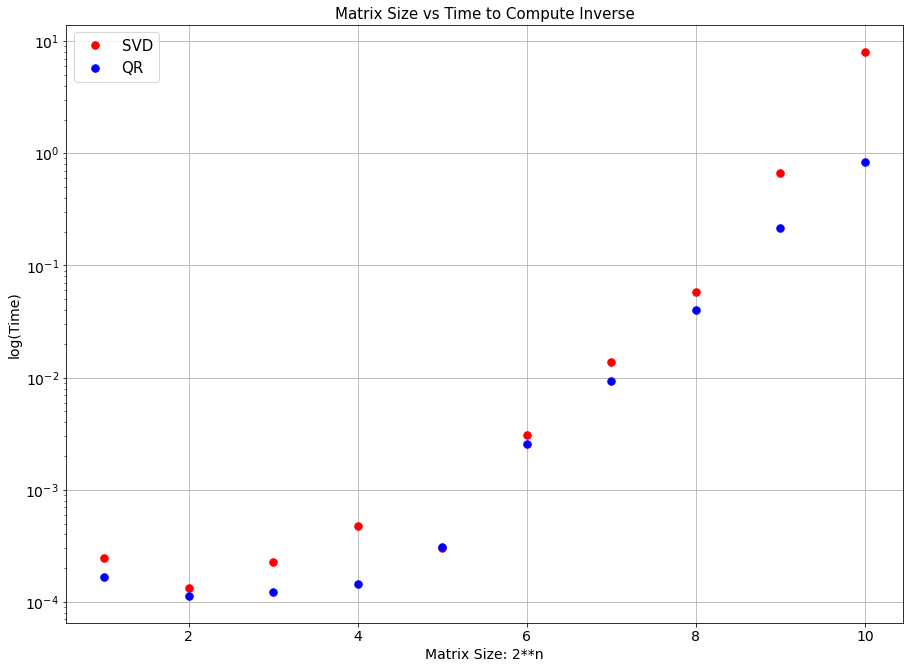

In [108]:
# Problem 1
#
# This program computes the pseudoinverse of a matrix using the SVD and QR methods for different sizes of
# arrays (ie. 2**n for n = 1..N) and benchmarks them to find the differing times.
#
# @author Scott Merkley
# @version January 13, 2022

import numpy as np
import matplotlib.pyplot as plt
import timeit as t
import warnings
warnings.filterwarnings('ignore')

from numpy.linalg import pinv

startN = 1
endN = 11
timeArr = np.zeros((2, endN - startN))
nArr = np.arange(startN, endN)

for n in range(startN, endN):
    
    # Creating an 2**n x 2**n matrix of n = 1..N
    xaxis = np.random.rand(2**n, 2**n)
    
    startTime = t.default_timer() # Setting up timer for SVD
    
    # SVD Pseudoinverse Method
    U, Sigma, V = np.linalg.svd(xaxis)
    invA = np.column_stack(V.dot(pinv(np.diag(Sigma))).dot(U[np.newaxis].T)).T
    
    endTime = t.default_timer() # Ending the timer for SVD
    timeArr[0, n - startN] = endTime - startTime  
    
    # -------------------------------------------------------------------------------
    
    startTime = t.default_timer() # Setting up timer for QR
    
    # QR Decomposition
    Q, R = np.linalg.qr(xaxis)
#     print(f'Q = \n {Q} \n\n R = \n {R}\n\n')
    invA = pinv(R).dot(np.transpose(Q))
#     print(f'invA = \n{invA}\n\n')
    
    endTime = t.default_timer() # Ending the timer for QR
    timeArr[1, n - startN] = endTime - startTime
    
# Making a plot of Matrix size vs Time
# Plot on a log scale
plt.figure(figsize = (15, 11))
plt.rcParams.update({'font.size': 14})
plt.semilogy(nArr, timeArr[0], 'r.', label = "SVD", markersize = 15)
plt.semilogy(nArr, timeArr[1], 'b.', label = "QR", markersize = 15)
plt.title("Matrix Size vs Time to Compute Inverse", size = 15)
plt.xlabel("Matrix Size: 2**n", size = 14)
plt.ylabel("log(Time)", size = 14)
plt.legend(prop = {'size' : 15})
plt.grid()
plt.show()

# Problem 2


Write a function which takes as input a Gaussian peak matrix with a bit of noise (something like the figure below) and tracks its shape and location.
You might want to generate your own test inputs, in which case use the function numpy.random.normal which we covered in class to generate some noise. Of course you will need to add this noise to the Gaussian peak, which you now have the tools to code up as well. For simplicity, you can set the Gaussian peak to have no eccentricity in x and y directions, meaning that
the xy cross-section of the Gaussian peak is circular. Let’s also set the input matrix size to be 512x512.

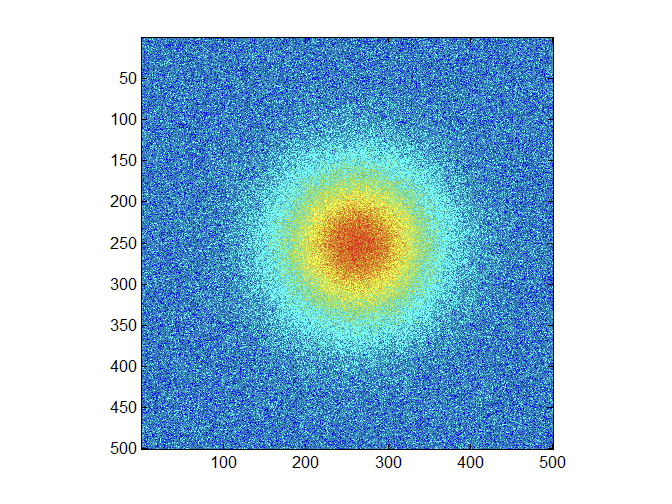

Now design a numerical least square estimator to extract Gaussian center and width (use matrix formalism we discussed in class, I am not looking for an iterative minimizer).

Note 1:
Comment your code well. I want to see at least the code layout documented in comments.

Note 2:
Pay attention to numerical stability. Test your code for various Gaussian offsets in z and various noise levels. Basically, sanitize your inputs.

Grading:
- Reducing the problem to a regression : 12 pts
- Setting up and performing the regression : 12 pts
- Handling unusual input cases : 8 pts
- Good comments : 8 points

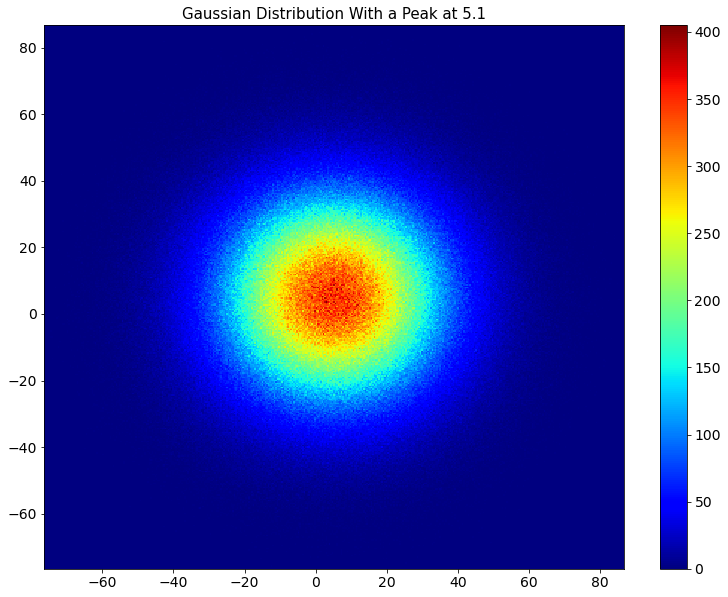

5.0999999999999694

In [106]:
# Problem 2
#
# In this program i will create a function that takes in a Gaussian Function and prints out a Gaussian Matrix like the above picture
#
# @author Scott Merkley
# @version January 23, 2022


import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Creating initial data for the Gaussian Peak
N = 5000000
spreadValue = 0
peakValue = 5.1

# Creating a distribution of random data for the Gaussian Matrix
x = np.random.normal(peakValue, spreadValue, N)

# This function intakes a Gaussian distributed linspace and prints back the peak value and a heat map
# of the Gaussian peak matrix.
#
# @param Gaussian distributed numpy linspace
# @return the peakValue and a plot of the matrix
def GPM(x):
    # Getting the peakValue from inverse matrix methods
    xv = x[:, None]
    cv = np.full_like(xv, 1)
    yv = np.random.normal(0, x.max(), len(x))[:, None]
    VDM = np.concatenate((yv, cv), axis = 1)

    # Setting the peak value to make the matrix
    peakValue = np.linalg.pinv(VDM).dot(xv)[1][0]
    spreadValue = peakValue * 4

    # Setting up the linspaces to create the Gaussian Peak Matrix
    x = np.random.normal(peakValue, spreadValue, len(x))
    y = np.random.normal(peakValue, spreadValue, len(x))

    # Plotting all the data
    plt.figure(figsize = (10 + 3, 10)) # add 3 for the colorbar
    plt.rcParams.update({'font.size': 14})
    plt.title(f'Gaussian Distribution With a Peak at {peakValue:0.4}', size = 15)
    plt.hist2d(x, y, (512, 512), cmap = 'jet')
    plt.xlim(peakValue - (spreadValue * 4), peakValue + (spreadValue * 4))
    plt.ylim(peakValue - (spreadValue * 4), peakValue + (spreadValue * 4))
    plt.colorbar()
    plt.show()
    
    return peakValue

GPM(x)

# Problem 3

Let’s start with a function which creates “data” with some noise and some interesting oscillating trend.

- N = 100
- x = linspace(0, 2 * pi, N) + random.normal(0, 1, N)/10
- y = 10 * sin(x) + 20 * sin(3 * x) + random.normal(0, 1, N)

Notice that the x-axis is not sampled at regular intervals but it’s spacing has some noise! The y axis values contain two sine waves and also some other unrelated noise. 

So the first task here is to make the above code work and to plot the data. I have deliberately removed module names from the code above so python does not know where to find the functions I used. The code will not work without some import statements and a bit of editing of the code I provided. Once you make it work, you have simulated a possible “real” situation where e.g. the noisy data has some dominant frequencies and is recorded at irregular time intervals. 

Now let’s say your friend recorded this data and gave it to you for analysis. You know a priori the constituent waves are sin(x) and sin(3*x) and you know the timestamps for when the data was recorded, i.e. the x axis values and the frequencies in the data. Use a numerical least square estimator to extract the coefficients in front of your sines (in the above example you should get back something close to 10 and 20). Again, I am not looking for an iterative minimizer. Use the  pseudoinverse to project your data onto the sinusoidal basis functions. 

Note: If you extend this approach and do some intelligent scanning over the possible frequencies, you can build up a frequency spectrum for data. This is only usually advantageous if the x-axis data is irregularly spaced. Such analysis is known as LSSA – least square spectrum analysis. For regularly spaced data, FFT is far superior and it will be covered later in class.

The trends are found to be approximately: 10.244 * sin(x) + 20.077 * sin(3 * x)


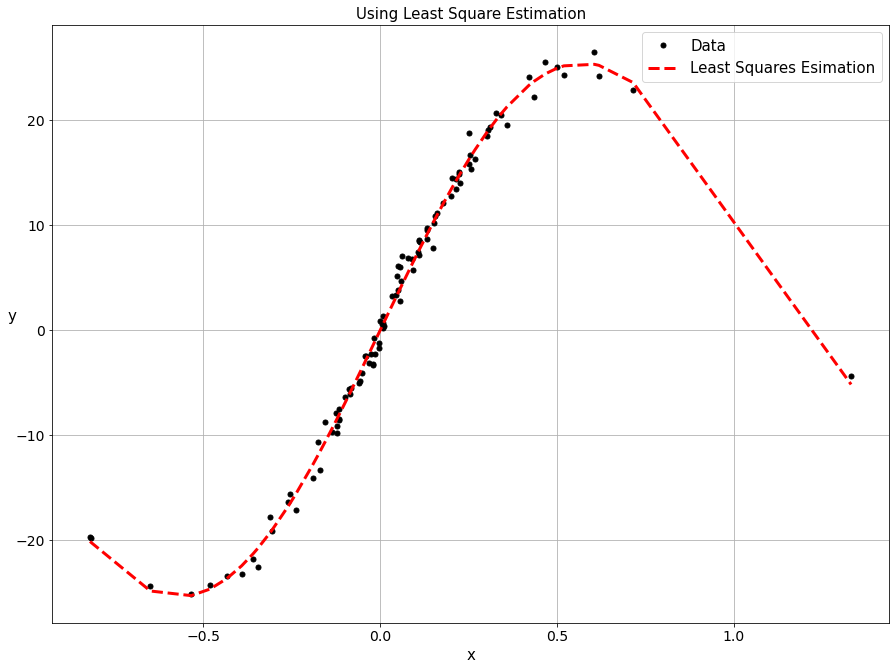

In [105]:
# Problem 3
#
# This program creates an x array of noisy points, plots them to the function 10 * sin(x) + 20 * sin(3 * x) + some noise and then using least 
# square estimation, finds the values in front of the sin functions and then plots all the data, reconstructing the function.
#
# @author Scott Merkley
# @version January 23, 2022

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

# splitting the data into 100 different points
N = 100

# creating an array of x values from 0..2*PI and adding in some random normal noise
x = np.sort(np.linspace(0, 2 * np.pi, N) * np.random.normal(0, 1, N) / 10)

# an array that creates the actual y values found in our 'data'
y = 10 * np.sin(x) + 20 * np.sin(3 * x) + np.random.normal(0, 1, N)

# Creating column vectors out of the arrays so they can be put into a VDM and used to find the least square approximation
xv = x[:, None]
cv = np.full_like(xv, 1)
yv = y[:, None]

# Creating the VDM using sin(x) and sin(3x)
VDM = np.column_stack([np.sin(xv), np.sin(3 * xv)])

# Solving the VDM for the coefficients in front of sin(x) and sin(3x)
coefficients = np.linalg.pinv(VDM).dot(yv)

# Creating our least squares estimation data and printing the found coefficients to the user
yCoefficients = coefficients[0, 0] * np.sin(x) + coefficients[1, 0] * np.sin(3 * x)
print(f'The trends are found to be approximately: {coefficients[0, 0]:0.5} * sin(x) + {coefficients[1, 0]:0.5} * sin(3 * x)')

# Plotting all the data
plt.figure(figsize = (15, 11))
plt.rcParams.update({'font.size': 14})
plt.title('Using Least Square Estimation', size = 15)
plt.plot(x, y, 'k.', label = 'Data', markersize = 10)
plt.plot(x, yCoefficients, 'r--', label = 'Least Squares Esimation', linewidth = 3)
plt.xlabel('x', size = 15)
plt.ylabel('y', rotation = 0, size = 15)
plt.legend(prop = {'size' : 15})
plt.grid()
plt.show()